In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [34]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [35]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [36]:
df.dropna(inplace=True)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

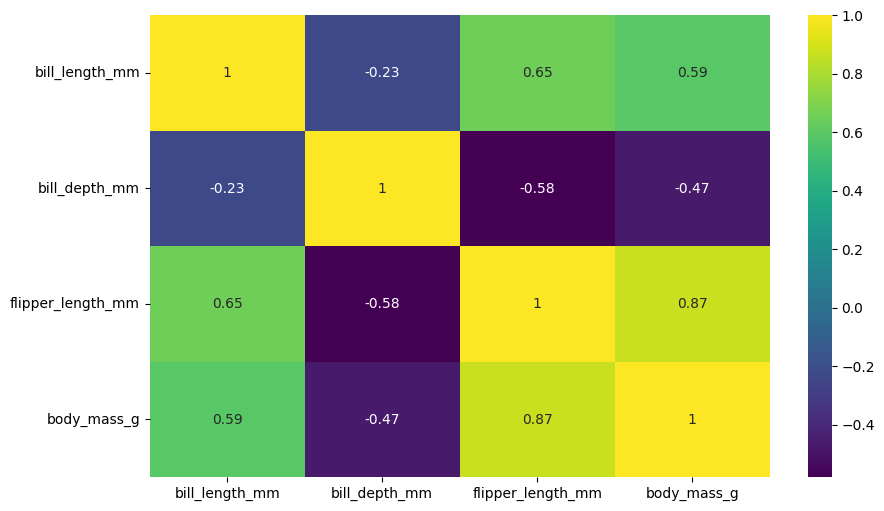

In [37]:
plt.figure(figsize=(10, 6))
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

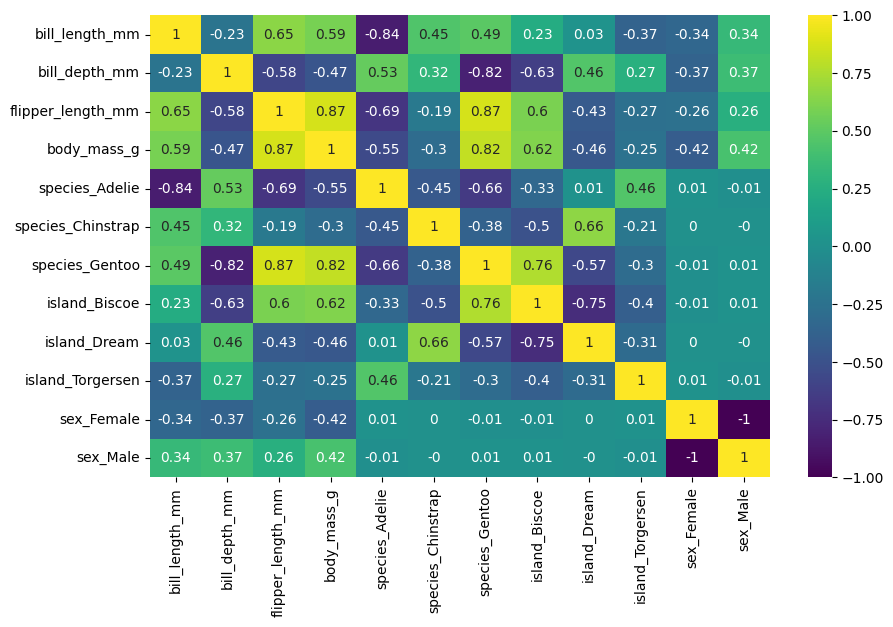

In [38]:
plt.figure(figsize=(10, 6))
df = pd.get_dummies(df)
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

In [39]:
df_results = pd.DataFrame(columns=['model_name', 'mae_train', 'rmse_train', 'mae_test', 'rmse_test'])

In [40]:
X = df[['flipper_length_mm']]
y = df['body_mass_g']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
y_predictions_test = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'model_name': 'Regresión lineal simple con flipper_length_mm',
    'mae_train': mae_train,
    'rmse_train': rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}
df_results.loc[df_results.shape[0]] = new_row
df_results.head()


,model_name,mae_train,rmse_train,mae_test,rmse_test
0,Regresión lineal simple con flipper_length_mm,318.277566,399.841338,290.130433,360.398002


In [43]:
X = df.drop('body_mass_g', axis=1) # Todas las columnas menos body_mass_g
y = df['body_mass_g']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
 
"""
Para cada penguin cuyo peso se quiere predecir, se calcula la distancia entre ese penguin y los demás 
penguin en función de las columnas de entrada.

Ordena las distancias calculadas en orden ascendente y selecciona las primeros k pinguinos y sobre ellos 
calcula la media de body_mass_g y ese será la predicción.

Las distancia se calcula con el parámetro metric: euclidiana, manhattan, minkowski, chebyshev
"""
model = KNeighborsRegressor(n_neighbors=7)

model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
y_predictions_test = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'model_name': 'KNNRegressor n_neighbors 7',
    'mae_train': mae_train,
    'rmse_train': rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}
df_results.loc[df_results.shape[0]] = new_row
df_results.head(4)

,model_name,mae_train,rmse_train,mae_test,rmse_test
0,Regresión lineal simple con flipper_length_mm,318.277566,399.841338,290.130433,360.398002
1,KNNRegressor n_neighbors 7,234.385070,295.408430,246.162047,306.505015
2,KNNRegressor n_neighbors 7,234.385070,295.408430,246.162047,306.505015
